In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df_mushroom = pd.read_csv('mushroom.csv',header = None)

In [25]:
df_mushroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [26]:
df_mushroom.columns=["type","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]


In [27]:
df_mushroom.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
df_mushroom.isnull().sum()

type                        0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

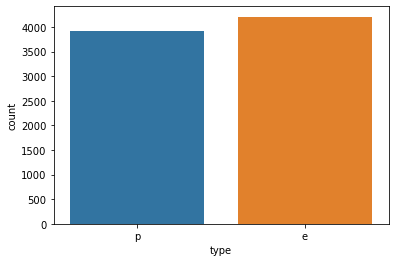

In [29]:
sns.countplot(x="type",data=df_mushroom)
plt.show()

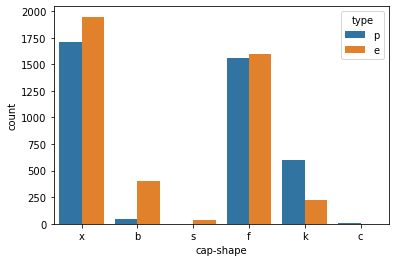

In [30]:
sns.countplot(x="cap-shape",hue="type",data=df_mushroom)
plt.show()

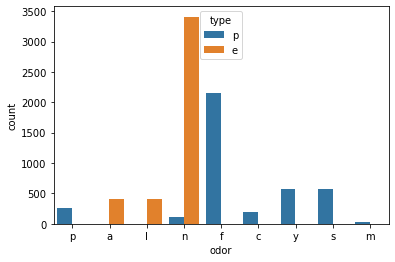

In [31]:
sns.countplot(x="odor",hue="type",data=df_mushroom)
plt.show()

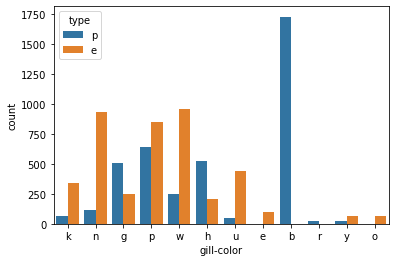

In [32]:
sns.countplot(x="gill-color",hue="type",data=df_mushroom)
plt.show()

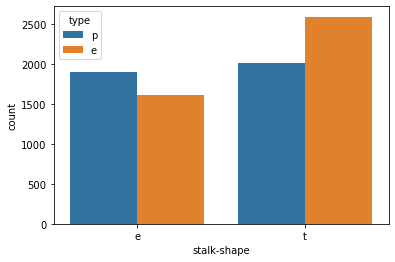

In [33]:
sns.countplot(x="stalk-shape",hue="type",data=df_mushroom)
plt.show()

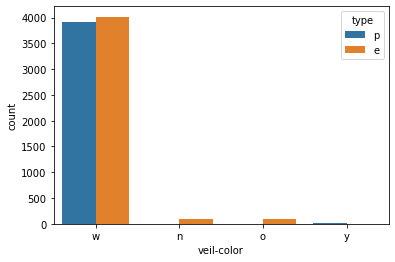

In [34]:
sns.countplot(x="veil-color",hue="type",data=df_mushroom)
plt.show()

In [35]:
df_mushroom.drop(columns=["veil-color"],inplace=True)

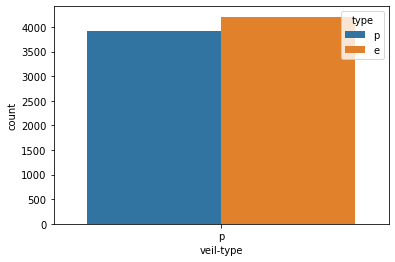

In [36]:
sns.countplot(x="veil-type",hue="type",data=df_mushroom)
plt.show()

In [37]:
df_x=df_mushroom.drop(columns=["type"])
y=df_mushroom[["type"]]

In [38]:
#converting the input into integers
df_x=pd.get_dummies(df_x,drop_first=True)


In [39]:
df_x.shape

(8124, 92)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [42]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [43]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,df_x,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  0.9980806142034548
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9987212276214833
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  0.9980806142034548
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  0.9993610223642173
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  0.999361022364217